# Tarea 9 - Machine Learning

In [49]:
#Funciones y librerias
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
import seaborn as sns

## Ejercicio 2

Identifica en tu centro laboral o entorno cotidiano una situación en la que puedas recopilar datos. Con base en tus datos, determina cuál técnica o modelo del aprendizaje no supervisado te conviene usar para realizar su agrupamiento y justifica tu respuesta.

Utilizando nuevamente el repositorio de UCI Machine Learning Repository, el set de *Mall Customers*, donde se contiene información de los clientes de un centro comercial, dicha información los gastos anuales por persona y una calificación de 1 a 100 del score que se le asigna dependiendo del gasto.

In [22]:
df = pd.read_csv(r'Tarea9_ML - Mall_Customers.csv')

In [28]:
df.rename(columns = {'Annual Income (k$)':'Income', 'Spending Score (1-100)': 'Spending'}, inplace = True)

In [30]:
df.head(5)

,CustomerID,Genre,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<function matplotlib.pyplot.show(close=None, block=None)>

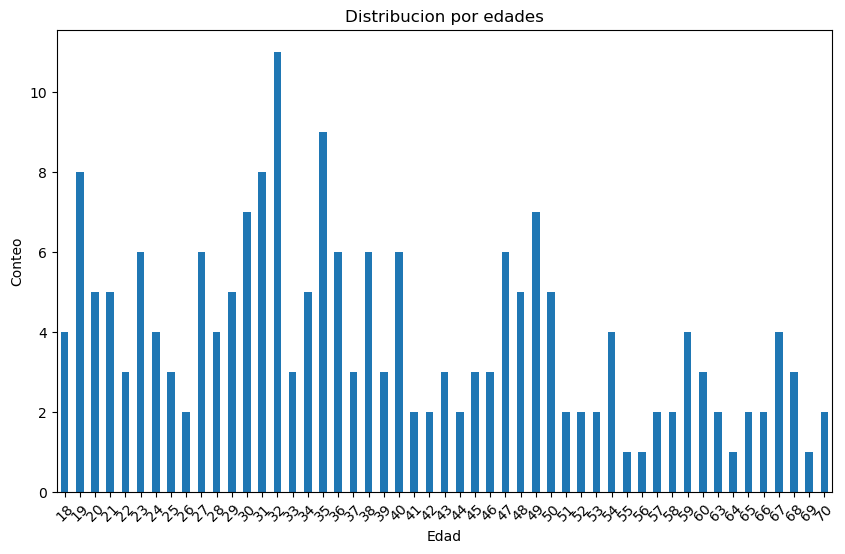

In [41]:
temp = df['Age'].value_counts().sort_index()
temp.plot(kind='bar', figsize = (10,6))
plt.title('Distribucion por edades')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.xticks(rotation = 45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

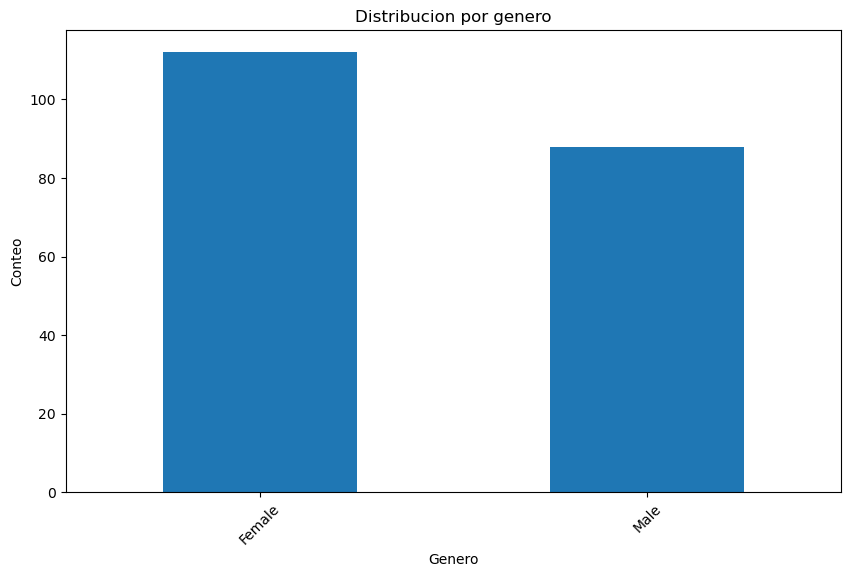

In [47]:
temp = df['Genre'].value_counts().sort_index()
temp.plot(kind='bar', figsize = (10,6))
plt.title('Distribucion por genero')
plt.xlabel('Genero')
plt.ylabel('Conteo')
plt.xticks(rotation = 45)
plt.show

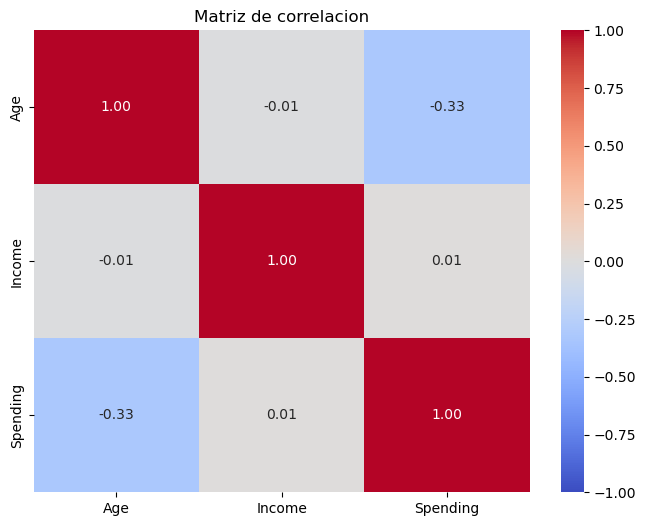

In [51]:
corr_matrix = df[['Age', 'Income', 'Spending']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Matriz de correlacion')
plt.show()

Con este análisis sobre la información proporcionada podemos obtener algunas inferencias sobre la información.
- Iniciando por que las personas que más gastan están entre el rango de edades de 29 a 31 años, seguido a las personas de 34 a 36 años. Por último, el grupo de 47 a 50 años. Obteniendo así 4 grupos a simple y rápida vista.
- Hay una relación entre la edad y el score de gasto de las personas. Fortaleciendo más la inferencia propuesta anteriormente.
- No hay mucha diferencia entre el género que realice más compras

Estas conclusiones mencionadas anteriormente suelen servir en este tipo de problemas de agrupación, la razón es que, además de estar tratando con un problema con pocas variables, en algunas ocasiones es mejor solo realizar un EDA en vez de un modelo perse. Suele conocerse vagamente como *Matar hormigas con un lanzallamas*, a pesar que Kmedias es un algoritmo muy poderoso, si tuvieramos más información de los clientes y la idea sea segmentarlos con el fin de ofrecerles una tarjeta de conveniencia, ofertas, etc. En este caso al tener poca información, solo haría falta realizar un análisis sencillo como el realizado anteriormente.

No habrá que aún descartar realizar el modelo de agrupamiento para obtener más información, con 5 grupos (añadiendo uno más a los vistos anteriomente) propuestos, obtenemos lo siguiente:

In [58]:
#Modelo K means
X = df[['Age', 'Income', 'Spending']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 5, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


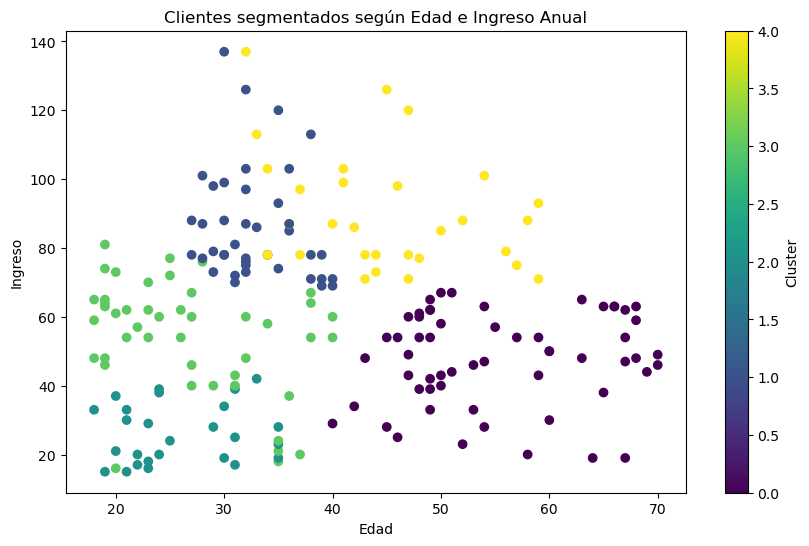

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Income'], c=df['Cluster'], cmap='viridis')
plt.title('Clientes segmentados según Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.colorbar(label='Cluster')
plt.show()

In [62]:
centroids = kmeans.cluster_centers_
print("Centroides de los clusters (normalizados):")
print(centroids)

Centroides de los clusters (normalizados):
[[ 1.17882975 -0.49388609 -0.32971553]
 [-0.42880597  0.97484722  1.21608539]
 [-0.93876351 -1.31473131  0.95680216]
 [-0.86957306 -0.23851652 -0.36060916]
 [ 0.39737911  1.11508909 -1.23126963]]


**Conclusiones de modelo**
- Tal como se esperaba, los clústers segmentados por edad repercute sobre el ingreso de cada persona.
- Se puede observar cómo los grupos son:
  
      - Grupo de 20 a 30 años (Ingresos de 20 a 40, 40 a 60)
      - Grupo de 30 a 40 años (Ingresos de 80 a 120)
      - Grupo de 35 a 60 años (Ingresos de 65 a 130)
      - Grupo de 40 a 70 años (Ingresos de 20 a 60)